# Week 12 handin

## 01 Assignment

## Exercise
### Part 1
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

## 02 Status

Done

## 03 Solution 

In [3]:
##Imports
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:
## Find the contour of the apple
## Draw a yellow circle with the center placed on the center of the apple contour
img = cv2.imread('./images/applegoogle.png', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


Image shape (760, 760, 3) Thresh (760, 760) [  0 254 255]


<Figure size 432x288 with 0 Axes>

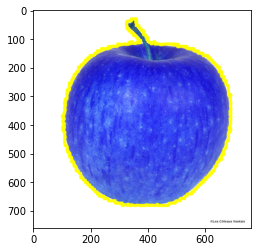

<Figure size 432x288 with 0 Axes>

In [5]:
## Draw a yellow circle with the center placed on the center of the apple contour
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(255,255,0),thickness=10)
plt.imshow(im1)
plt.figure()

x,y,w,h: 102 30 588 652


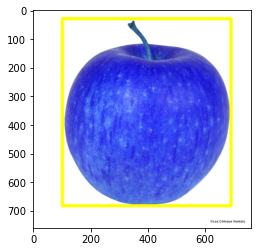

In [8]:
##Draw a square that precisely holds the apple
result = img.copy()

for cntr in contours:
    x,y,w,h = cv2.boundingRect(cntr)
    cv2.rectangle(result, (x, y), (x+w, y+h), (255, 255, 0), 10)
    print("x,y,w,h:",x,y,w,h)

plt.imshow(result)

Image shape (250, 600, 3) Thresh (250, 600) [  0 254 255]
Results:
There are 3 apples


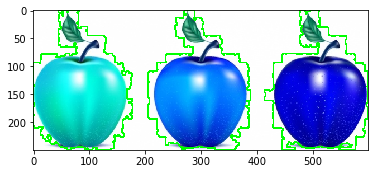

In [12]:
##Use contours to programmatically identify the number of apples in the photo
img = cv2.imread('./images/three_apples.png', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print('Results:')
print(f'There are {count} apples')